In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import t,ttest_ind,ks_2samp,shapiro,anderson 
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm
import statsmodels.formula.api as smf
warnings.filterwarnings("ignore")
import os
from scipy.stats import levene,bartlett,shapiro

import scipy.stats as stats

os.getcwd()

'C:\\Users\\Vahid\\OneDrive - University of Toronto\\MMA - 2022 -\\Jupyter files'

# Reading file

In [6]:
#path = '/Users/Vahid/Library/CloudStorage/OneDrive-UniversityofToronto/MMA - 2022 -/Jupyter files/'
path = "C:/Users/Vahid/OneDrive - University of Toronto/MMA - 2022 -/Jupyter files/"
df_raw = pd.read_excel(path+'Data/UBER.xlsx', sheet_name ='Switchbacks' )

In [7]:
df_raw.head()

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
0,Boston,2018-02-19 07:00:00,2 mins,False,True,1415,3245,256,34458.411634,3372,1476
1,Boston,2018-02-19 09:40:00,5 mins,True,False,1461,2363,203,29764.349821,2288,1275
2,Boston,2018-02-19 12:20:00,2 mins,False,False,1362,2184,118,27437.367363,2283,962
3,Boston,2018-02-19 15:00:00,5 mins,True,True,1984,3584,355,44995.452993,4035,2021
4,Boston,2018-02-19 17:40:00,2 mins,False,False,1371,2580,181,27583.955295,2200,979


In [13]:
df_raw.columns

Index(['city_id', 'period_start', 'wait_time', 'treat', 'commute',
       'trips_pool', 'trips_express', 'rider_cancellations',
       'total_driver_payout', 'total_matches', 'total_double_matches',
       'day_name', 'time'],
      dtype='object')

In [8]:
df_raw['day_name'] = df_raw['period_start'].dt.day_name()

In [9]:
df_raw.groupby(['day_name','wait_time'])['treat'].count().reset_index().rename(columns={'treat':'num_observation'}).sort_values(by='day_name')

,day_name,wait_time,num_observation
0,Friday,2 mins,9
1,Friday,5 mins,9
2,Monday,2 mins,9
3,Monday,5 mins,9
4,Saturday,2 mins,9
5,Saturday,5 mins,9
6,Sunday,2 mins,9
7,Sunday,5 mins,9
8,Thursday,2 mins,9
9,Thursday,5 mins,9


In [10]:
df_raw['time'] = df_raw['period_start'].apply(lambda x: x.time())

In [12]:
summary = df_raw.groupby(['day_name','time','wait_time'])['wait_time'].count()#.reset_index().rename(columns={'treat':'num_observation'}).sort_values(by='day_name')
summary.unstack(["time",'wait_time'])

time      01:40:00        04:20:00        07:00:00        09:40:00         \
wait_time   2 mins 5 mins   2 mins 5 mins   2 mins 5 mins   2 mins 5 mins   
day_name                                                                    
Friday           1      1        1      1        1      1        1      1   
Monday           1      1        1      1        1      1        1      1   
Saturday         1      1        1      1        1      1        1      1   
Sunday           1      1        1      1        1      1        1      1   
Thursday         1      1        1      1        1      1        1      1   
Tuesday          1      1        1      1        1      1        1      1   
Wednesday        1      1        1      1        1      1        1      1   

time      12:20:00        15:00:00        17:40:00        20:20:00         \
wait_time   2 mins 5 mins   2 mins 5 mins   2 mins 5 mins   2 mins 5 mins   
day_name                                                                    
Friday           1      1        1      1        1      1        1      1   
Monday           1      1        1      1        1      1        1      1   
Saturday         1      1        1      1        1      1        1      1   
Sunday           1      1        1      1        1      1        1      1   
Thursday         1      1        1      1        1      1        1      1   
Tuesday          1      1        1      1        1      1        1      1   
Wednesday        1      1        1      1        1      1        1      1   

time      23:00:00         
wait_time   2 mins 5 mins  
day_name                   
Friday           1      1  
Monday           1      1  
Saturday         1      1  
Sunday           1      1  
Thursday         1      1  
Tuesday          1      1  
Wednesday        1      1

# Deriving new features 

In [14]:
df_raw['total_ride'] = df_raw['trips_express'] + df_raw['trips_pool']
df_raw['cost_per_ride'] = df_raw['total_driver_payout']/df_raw['total_ride']
df_raw['double_matches_rate'] = df_raw['total_double_matches']/df_raw['total_ride']
df_raw['match_rate'] = df_raw['total_matches']/df_raw['total_ride']

# Summary Table

In [15]:
summary = df_raw.groupby(['wait_time'])['rider_cancellations','trips_pool','trips_express','total_ride','cost_per_ride','match_rate','double_matches_rate'].agg('mean').T
summary['diff (5mins - 2mins)'] = summary['5 mins'] - summary['2 mins']
summary

wait_time,2 mins,5 mins,diff (5mins - 2mins)
rider_cancellations,165.349206,190.126984,24.777778
trips_pool,1355.317460,1460.698413,105.380952
trips_express,2611.666667,2419.380952,-192.285714
total_ride,3966.984127,3880.079365,-86.904762
cost_per_ride,7.364866,6.987458,-0.377409
match_rate,0.659115,0.624274,-0.034842
double_matches_rate,0.321761,0.348986,0.027224


# Histograms

###  Pool Trips

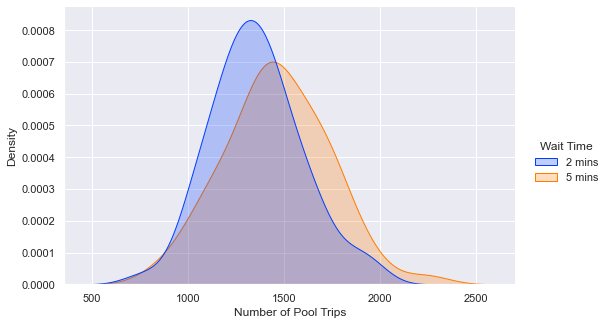

In [16]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.set(font_scale = 1)

g = sns.displot(data=df_raw, x='trips_pool', hue='wait_time', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
g.figure.subplots_adjust(top=0.9);
g._legend.set_title('Wait Time')
g.set(xlabel='Number of Pool Trips', ylabel='Density')

### Express Trips

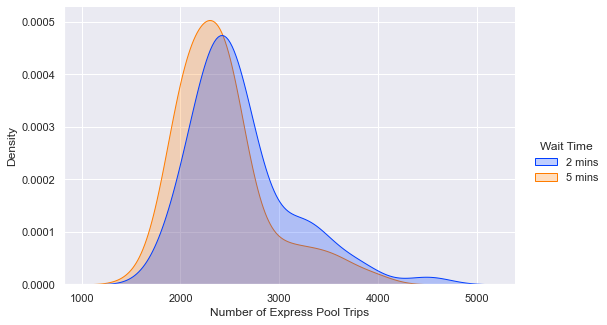

In [17]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.set(font_scale = 1)

g = sns.displot(data=df_raw, x='trips_express', hue='wait_time', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
g.figure.subplots_adjust(top=0.9);
g._legend.set_title('Wait Time')
g.set(xlabel='Number of Express Pool Trips', ylabel='Density')

### Total Rides

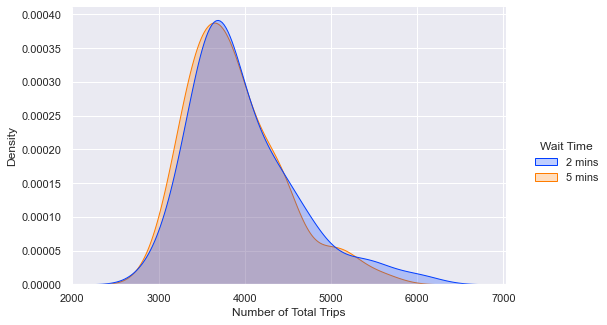

In [18]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.set(font_scale = 1)

g = sns.displot(data=df_raw, x='total_ride', hue='wait_time', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
g.figure.subplots_adjust(top=0.9);
g._legend.set_title('Wait Time')
g.set(xlabel='Number of Total Trips', ylabel='Density')

### Ride Cancellation

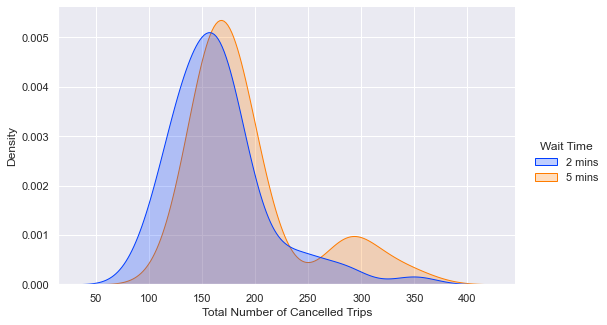

In [19]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1)

g = sns.displot(data=df_raw, x='rider_cancellations', hue='wait_time', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
g.figure.subplots_adjust(top=0.9);
g._legend.set_title('Wait Time')
g.set(xlabel='Total Number of Cancelled Trips', ylabel='Density')

# Efficiency Metrics

### Cost per ride

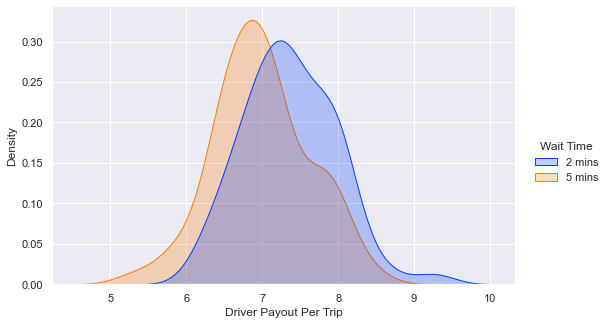

In [20]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1)

g = sns.displot(data=df_raw, x='cost_per_ride', hue='wait_time', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
g.figure.subplots_adjust(top=0.9);

g._legend.set_title('Wait Time')
g.set(xlabel='Driver Payout Per Trip', ylabel='Density')

### Match Rate

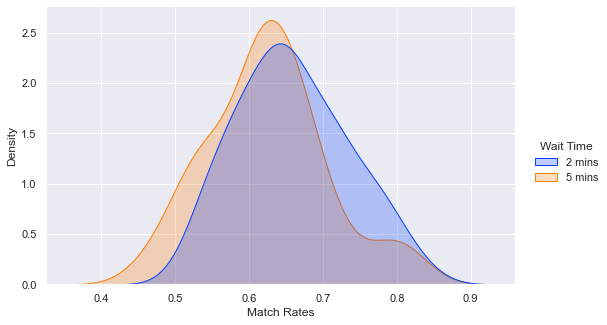

In [21]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1)

g = sns.displot(data=df_raw, x='match_rate', hue='wait_time', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
g.figure.subplots_adjust(top=0.9);

g._legend.set_title('Wait Time')
g.set(xlabel='Match Rates', ylabel='Density')

### Double Match Rate

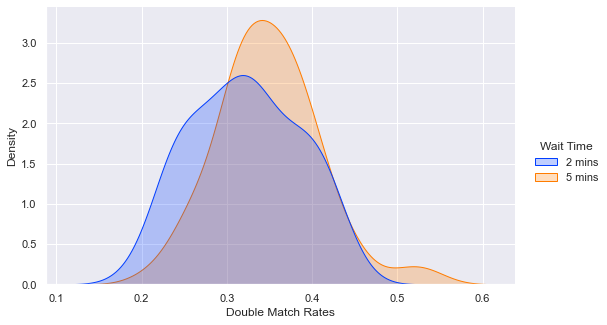

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1)

g = sns.displot(data=df_raw, x='double_matches_rate', hue='wait_time', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
g.figure.subplots_adjust(top=0.9);
g._legend.set_title('Wait Time')
g.set(xlabel='Double Match Rates', ylabel='Density')

## Total Trips Ride 

### Non-Parametric Test: Mann-Whitney U test

In [23]:
statistic,p_value = stats.mannwhitneyu(df_raw[df_raw['treat']==False]['total_ride'],df_raw[df_raw['treat']==True]['total_ride'], alternative='two-sided')
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))


Statistics = 2122.000, P-value=0.504


## Equal Variance test 

In [24]:
statistic,p_value = levene(df_raw[df_raw['treat']==False]['total_ride'],df_raw[df_raw['treat']==True]['total_ride'])
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))

Statistics = 0.126, P-value=0.723


In [25]:
statistic,p_value = stats.f_oneway(df_raw[df_raw['treat']==False]['total_ride'],df_raw[df_raw['treat']==True]['total_ride'])
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))

Statistics = 0.721, P-value=0.397


##  T-test

In [13]:
statistic,p_value =  ttest_ind(df_raw[df_raw['treat']==False]['total_ride'],df_raw[df_raw['treat']==True]['total_ride'], alternative='two-sided')
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))

Statistics = 0.849, P-value=0.397


## Express Trips

#### Parametric t - test

In [60]:
statistic,p_value = ttest_ind(df_raw[df_raw['treat']==False]['trips_express'], df_raw[df_raw['treat']==True]['trips_express'], alternative='two-sided')

print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))


Statistics = 2.202, P-value=0.030


#### Non-Parametric Mann Whitney U - test

In [61]:
statistic,p_value = stats.mannwhitneyu(df_raw[df_raw['treat']==False]['trips_express'], df_raw[df_raw['treat']==True]['trips_express'], alternative='two-sided')
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))

Statistics = 2491.500, P-value=0.013


# Pool Trips

#### Parametric t - test

In [62]:
statistic,p_value = ttest_ind(df_raw[df_raw['treat']==False]['trips_pool'], df_raw[df_raw['treat']==True]['trips_pool'], alternative='two-sided')
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))    

Statistics = -2.333, P-value=0.021


#### Non-Parametric Mann Whitney U - test

In [63]:
statistic,p_value =  stats.mannwhitneyu(df_raw[df_raw['treat']==False]['trips_pool'], df_raw[df_raw['treat']==True]['trips_pool'], alternative='two-sided')
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value)) 

Statistics = 1491.500, P-value=0.016


## Ride Cancellation

#### Parametric t - test

In [64]:
statistic,p_value =  ttest_ind(df_raw[df_raw['treat']==False]['rider_cancellations'], df_raw[df_raw['treat']==True]['rider_cancellations'], alternative='two-sided')
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))

Statistics = -2.764, P-value=0.007


#### Non-Parametric Mann Whitney U - test

In [65]:
statistic,p_value =  stats.mannwhitneyu(df_raw[df_raw['treat']==False]['rider_cancellations'], df_raw[df_raw['treat']==True]['rider_cancellations'], alternative='two-sided')
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))

Statistics = 1367.000, P-value=0.003


## Double Matches Rate

#### Parametric t - test

In [66]:
statistic,p_value =  ttest_ind(df_raw[df_raw['treat']==False]['double_matches_rate'], df_raw[df_raw['treat']==True]['double_matches_rate'], alternative='two-sided')
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))


Statistics = -2.482, P-value=0.014


#### Non-Parametric Mann Whitney U - test

In [67]:
statistic,p_value =  stats.mannwhitneyu(df_raw[df_raw['treat']==False]['double_matches_rate'], df_raw[df_raw['treat']==True]['double_matches_rate'], alternative='two-sided')
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))


Statistics = 1533.000, P-value=0.028


## Match Rate

#### Parametric t - test

In [68]:
statistic,p_value =  ttest_ind(df_raw[df_raw['treat']==False]['match_rate'], df_raw[df_raw['treat']==True]['match_rate'], alternative='two-sided')
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))


Statistics = 2.517, P-value=0.013


#### Non-Parametric Mann Whitney U - test

In [69]:
statistic,p_value =  stats.mannwhitneyu(df_raw[df_raw['treat']==False]['match_rate'], df_raw[df_raw['treat']==True]['match_rate'], alternative='two-sided')
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))


Statistics = 2480.000, P-value=0.016


## Cost per Rider

#### Parametric t - test

In [70]:
statistic,p_value =  ttest_ind(df_raw[df_raw['treat']==False]['cost_per_ride'], df_raw[df_raw['treat']==True]['cost_per_ride'], alternative='two-sided')
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))

Statistics = 3.462, P-value=0.001


#### Non-Parametric Mann Whitney U - test

In [71]:
statistic,p_value =  stats.mannwhitneyu(df_raw[df_raw['treat']==False]['cost_per_ride'], df_raw[df_raw['treat']==True]['cost_per_ride'], alternative='two-sided')
print('Statistics = %.3f, P-value=%.3f' %(statistic,p_value))

Statistics = 2666.000, P-value=0.001


# Regression Analysis

In [72]:
#gauss_log = smf.glm(formula = formula, data=df_raw, family=sm.families.Gaussian(sm.families.links.log()))

In [28]:
formulas = ['trips_pool ~ wait_time', 'trips_express ~ wait_time', 'rider_cancellations ~ wait_time',
            'double_matches_rate ~ wait_time','match_rate ~ wait_time','cost_per_ride ~ wait_time',
            'total_ride ~ wait_time']
for formula in formulas: 
    gauss_log = smf.glm(formula = formula, data=df_raw, family=sm.families.Gaussian())
    gauss_results = gauss_log.fit()
    print(gauss_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             trips_pool   No. Observations:                  126
Model:                            GLM   Df Residuals:                      124
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          64243.
Method:                          IRLS   Log-Likelihood:                -875.22
Date:                Mon, 30 Jan 2023   Deviance:                   7.9661e+06
Time:                        14:26:26   Pearson chi2:                 7.97e+06
No. Iterations:                     3   Pseudo R-squ. (CS):            0.04242
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1355.3175    